# Import Libraries

In [1]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Generate and Visualize data

In [2]:
data = np.sin(0.1*np.arange(200)) 

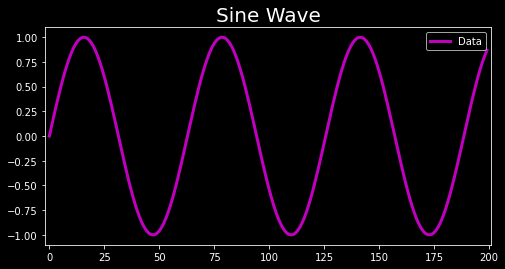

In [3]:
plt.figure(figsize=(8,4))
plt.xlim(-2,201)
plt.plot(data, 'm', lw =3, label = 'Data')
plt.title('Sine Wave', fontsize = 20)
plt.legend()
plt.show()

# Set the data for LSTM Using Window size or Seqlen = 10

In [4]:
T = 10
X = []
Y = []
for t in range(len(data) - T):
  x = data[t:t+T]
  X.append(x)
  y = data[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Reshape to N x T x D
y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "y.shape", y.shape)

X.shape (190, 10, 1) y.shape (190,)


# Split the half of the data to train and half to test

In [5]:
X_train = X[:-N//2]
y_train = y[:-N//2]
X_test  = X[-N//2:]
y_test  = y[-N//2:]

# Create LSTM Model

In [6]:
H = 5 # Hidden size
i = Input(shape=(T, 1))  # Input is T x D
print(i.shape)
X = LSTM(H)(i)
X = Dense(1)(X)
model = Model(i, X)


(None, 10, 1)


# Compile the Model

In [7]:
model.compile( loss='mse', optimizer=Adam(learning_rate = 0.1) )

# Train the Model

In [8]:
hist = model.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test))

Epoch 1/80
3/3 [==============================] - 2s 208ms/step - loss: 0.1465 - val_loss: 0.1792
Epoch 2/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0695 - val_loss: 0.0566
Epoch 3/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0596 - val_loss: 0.0178
Epoch 4/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0263 - val_loss: 0.0398
Epoch 5/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0221 - val_loss: 0.0106
Epoch 6/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0154 - val_loss: 0.0066
Epoch 7/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0084 - val_loss: 0.0081
Epoch 8/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0069 - val_loss: 0.0067
Epoch 9/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 10/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 11/80
3/3 [===========

3/3 [==============================] - 0s 15ms/step - loss: 3.2133e-06 - val_loss: 2.8383e-06
Epoch 80/80
3/3 [==============================] - 0s 16ms/step - loss: 2.4450e-06 - val_loss: 2.5433e-06


# Visualize Training and Test Loss

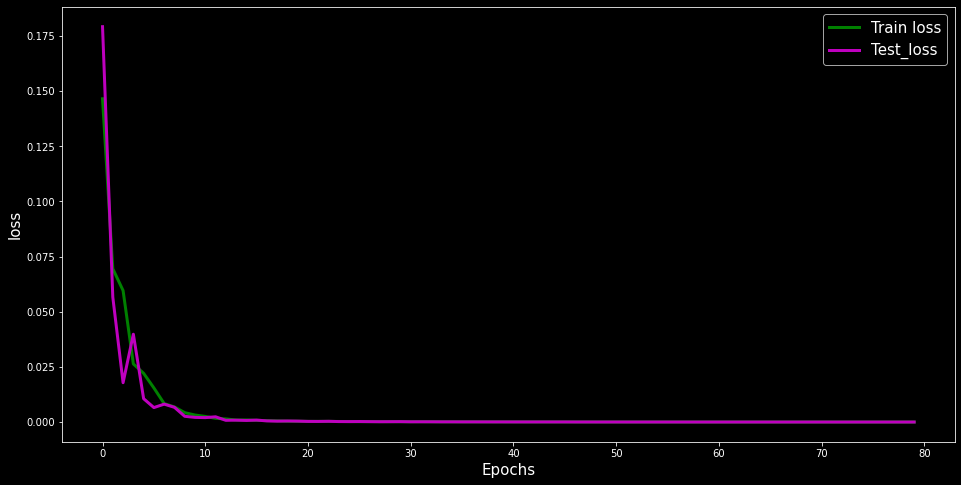

In [9]:
plt.figure(figsize = (16, 8))
plt.plot(hist.history['loss'],'g', lw = 3,  label='Train loss')
plt.plot(hist.history['val_loss'],'m', lw = 3, label='Test_loss')
plt.legend(fontsize = 15)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

# Test the Model by getting predictions about the future values

In [10]:
ypred = []

# first input for test

last_x = X_test[0]

while len(ypred) < len(y_test):
  p = model.predict(last_x.reshape(1, -1))[0,0]          

  # update the predictions list
  ypred.append(p)
  
  # make the new testing input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 16ms/step


In [11]:
#X_test[0]

In [12]:
#X_test[0].reshape(1, -1)[0,0]  

# Visualize Performance of the Model

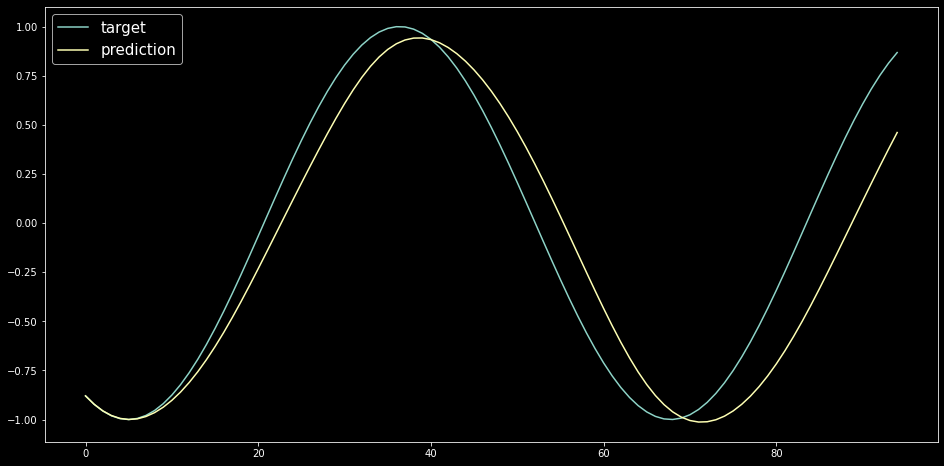

In [13]:
plt.figure(figsize = (16, 8))
plt.plot(y_test, label='target')
plt.plot(ypred, label='prediction')
plt.legend(fontsize = 15)
plt.show()